# 1. Preliminaries

Set working directory

In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'/home/romagnolilab/Documents/GitHub/PROJECT'

Load Dependables

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.data_preprocess import DataPreprocessing
from src.dimensionality import DimensionalityReduction


Load Data

In [3]:
pathX = "data/raw/RawData.xlsx"

preprocess = DataPreprocessing()
data = preprocess.load_data(pathX, target_path = None, is_dataframe = True, justFeatures = False)

In [4]:
data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


Transform Data

In [5]:
norm_data = preprocess.scale_data()
norm_data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,0.350968,0.292521,0.238525,0.468659,0.777944,0.757940,0.516965,0.493909,0.450876,0.240103,...,0.266622,0.464588,0.0,0.241389,0.277760,0.580246,0.0,0.788559,0.310381,0.0
1,0.350702,0.308210,0.297161,0.459386,0.788652,0.739205,0.521489,0.509693,0.256541,0.238025,...,0.266895,0.470400,0.0,0.240813,0.280527,0.578484,0.0,0.769701,0.246380,0.0
2,0.350251,0.459634,0.209477,0.479083,0.778920,0.784015,0.529546,0.463563,0.609511,0.247526,...,0.267055,0.473396,0.0,0.250898,0.282877,0.586596,0.0,0.772480,0.194822,0.0
3,0.352372,0.300972,0.251013,0.442794,0.727265,0.789300,0.533128,0.363171,0.393308,0.267338,...,0.267687,0.476511,0.0,0.268356,0.278263,0.568077,0.0,0.771891,0.172568,0.0
4,0.350848,0.234122,0.252805,0.514226,0.781072,0.752830,0.536877,0.428209,0.375227,0.286009,...,0.263968,0.486108,0.0,0.289550,0.276511,0.576815,0.0,0.791836,0.218329,0.0


# 2. Dimensionality Reduction

In [6]:
dreduction = DimensionalityReduction(norm_data)

## 2.1 PCA

A. Number of Components = 2

In [7]:
pca_2D_data = dreduction.fit_PCA(n_comp = 2)
#dreduction.plot_2D_scatter(pca_2D_data, labels = {'x': 'PCA 1', 'y': 'PCA 2', 'type': 'PCA'})

B. Number of Components = 3

In [8]:
pca_3D_data = dreduction.fit_PCA(n_comp = 3)
#dreduction.plot_3D_scatter(pca_3D_data, labels = {'x': 'PCA 1', 'y': 'PCA 2', 'z': 'PCA 3', 'type': 'PCA'})

C. Number of Components = 20

In [9]:
pca_20components = dreduction.fit_PCA(n_comp = 20)

In [10]:
#dreduction.plot_pcaVariance()

# 2.2 tSNE

A. number of components = 2

In [11]:
tsne_2D_data = dreduction.fit_tSNE(n_comp = 2, perplexity = 5)
#dreduction.plot_2D_scatter(tsne_2D_data, labels = {'x': 'tSNE 1', 'y': 'tSNE 2', 'type': 'tSNE'})

B. number of component = 3

In [12]:
tsne_3D_data = dreduction.fit_tSNE(n_comp = 3, perplexity = 5)
#dreduction.plot_3D_scatter(tsne_3D_data, labels = {'x': 'tSNE 1', 'y': 'tSNE 2', 'z': 'tSNE 3', 'type': 'tSNE'})

Effect of perplexity

A. number of component = 2

In [13]:
#dreduction.plot_perplexity_effect(n_comp = 2, perpelixty_list = [5, 10, 15, 20, 25, 30])

B. number of components = 3

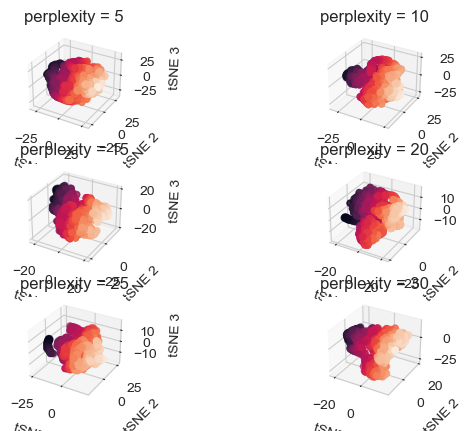

<Figure size 640x480 with 0 Axes>

In [14]:
dreduction.plot_perplexity_effect(n_comp = 3, perpelixty_list = [5, 10, 15, 20, 25, 30])

# 2.3 ISOMAP

A. number of component = 2

In [15]:
ISOMAP_2D_data = dreduction.fit_isomap(n_comp = 2, neighbors = 5)
#dreduction.plot_2D_scatter(ISOMAP_2D_data, labels = {'x': 'isM 1', 'y': 'isM 2', 'type': 'ISOMAP'})

B. number of component = 3

In [16]:
ISOMAP_3D_data = dreduction.fit_isomap(n_comp = 3, neighbors = 5)
#dreduction.plot_3D_scatter(ISOMAP_3D_data, labels = {'x': 'isM 1', 'y': 'isM 2', 'z': 'isM 3', 'type': 'ISOMAP'})

Effect of number of neighbors

A. number of components = 2

In [17]:
#dreduction.plot_neighbors_effect(n_comp = 2, neighborsint = [5, 10, 15, 20, 25, 30])

B. number of components = 3

In [18]:
#dreduction.plot_neighbors_effect(n_comp = 3, neighborsint = [5, 10, 15, 20, 25, 30])

# 2.4 fast ICA

A. number of components = 2

In [19]:
fastICA_2D_data = dreduction.fit_fastICA(n_comp = 2)
#dreduction.plot_2D_scatter(fastICA_2D_data, labels = {'x': 'fast ICA 1', 'y': 'fast ICA 2', 'type': 'fast ICA'})

B. number of components = 3

In [20]:
fastICA_3D_data = dreduction.fit_fastICA(n_comp = 3)
#dreduction.plot_3D_scatter(fastICA_3D_data, labels = {'x': 'fast ICA 1', 'y': 'fast ICA 2', 'z': 'fast ICA 3', 'type': 'fast ICA'})

# 2.5 Spectral Embedding

A. number of components = 2

In [21]:
embedding_2D_data = dreduction.fit_SpectralEmbedding(n_comp = 2)
#dreduction.plot_2D_scatter(embedding_2D_data, labels = {'x': 'SE1', 'y': 'SE2', 'type': 'Spectral Embedding'})

B. number of components = 3

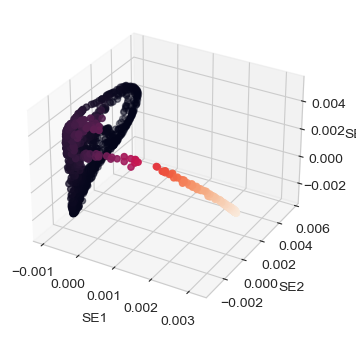

<Figure size 640x480 with 0 Axes>

In [22]:
embedding_3D_data = dreduction.fit_SpectralEmbedding(n_comp = 3)
dreduction.plot_3D_scatter(embedding_3D_data, labels = {'x': 'SE1', 'y': 'SE2', 'z': 'SE3', 'type': 'Spectral Embedding'})

# 3. Clustering

In [23]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, Birch, AgglomerativeClustering
import hdbscan


## 3.1 K Means

In [56]:
kmeans = KMeans(n_clusters = 5, random_state = 1, n_init = 10)

from PCA data 

In [57]:
# fit data
kmeans_with_pca = kmeans.fit(pca_3D_data)

In [58]:
# predict cluster
kmeans_PCA_3D_data = kmeans_with_pca.predict(pca_3D_data)

Text(0.5, 0.92, 'PCA')

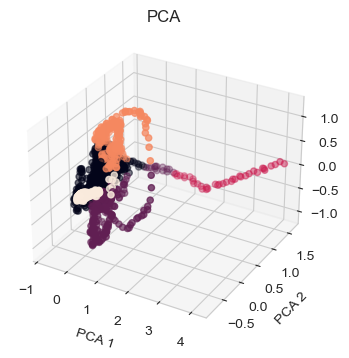

In [59]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = pca_3D_data[:, 0]
y = pca_3D_data[:, 1]
z = pca_3D_data[:, 2]

axs.scatter(x, y, z, c = kmeans_PCA_3D_data, marker='o')

axs.set_xlabel('PCA 1')
axs.set_ylabel('PCA 2')
axs.set_zlabel('PCA 3')
axs.set_title('PCA')

from tSNE

In [60]:
# fit data
kmeans_with_tSNE = kmeans.fit(tsne_3D_data)

In [61]:
# predict cluster
kmeans_tSNE_3D_data = kmeans_with_tSNE.predict(tsne_3D_data)

Text(0.5, 0.92, 'tSNE')

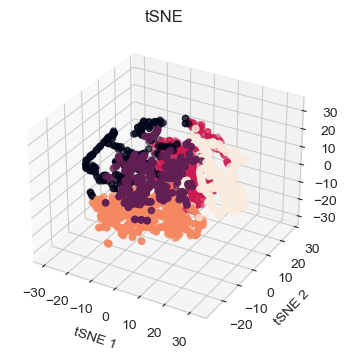

In [62]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = tsne_3D_data[:, 0]
y = tsne_3D_data[:, 1]
z = tsne_3D_data[:, 2]

axs.scatter(x, y, z, c = kmeans_tSNE_3D_data, marker='o')

axs.set_xlabel('tSNE 1')
axs.set_ylabel('tSNE 2')
axs.set_zlabel('tSNE 3')
axs.set_title('tSNE')

from ISOMAP

In [63]:
# fit data
kmeans_with_isomap = kmeans.fit(ISOMAP_3D_data)

In [64]:
# predict cluster
kmeans_isomap_3D_data = kmeans_with_isomap.predict(ISOMAP_3D_data)

Text(0.5, 0.92, 'ISOMAP')

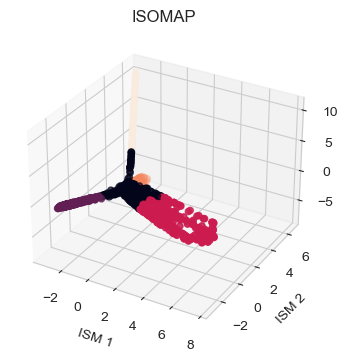

In [65]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = ISOMAP_3D_data[:, 0]
y = ISOMAP_3D_data[:, 1]
z = ISOMAP_3D_data[:, 2]

axs.scatter(x, y, z, c = kmeans_isomap_3D_data, marker='o')

axs.set_xlabel('ISM 1')
axs.set_ylabel('ISM 2')
axs.set_zlabel('ISM 3')
axs.set_title('ISOMAP')

from fast ICA

In [66]:
# fit data
kmeans_with_fastICA = kmeans.fit(fastICA_3D_data)

In [67]:
# predict cluster
kmeans_fastICA_3D_data = kmeans_with_fastICA.predict(fastICA_3D_data)

Text(0.5, 0.92, 'Fast ICA')

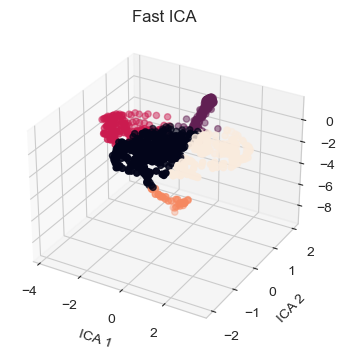

In [68]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = fastICA_3D_data[:, 0]
y = fastICA_3D_data[:, 1]
z = fastICA_3D_data[:, 2]

axs.scatter(x, y, z, c = kmeans_fastICA_3D_data, marker='o')

axs.set_xlabel('ICA 1')
axs.set_ylabel('ICA 2')
axs.set_zlabel('ICA 3')
axs.set_title('Fast ICA')

from Spectral Embedding

In [69]:
# fit data
kmeans_with_Embedding = kmeans.fit(embedding_3D_data)

In [70]:
# predict cluster
kmeans_embedding_3D_data = kmeans_with_Embedding.predict(embedding_3D_data)

Text(0.5, 0.92, 'Spectral Embedding')

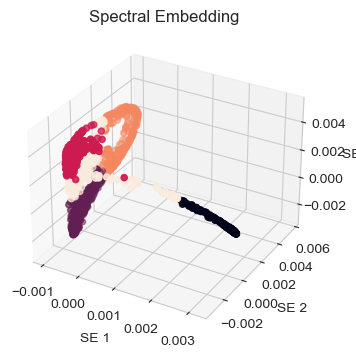

In [77]:
# plot cluster

fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : True})

axs = fig.add_subplot(111, projection='3d')

x = embedding_3D_data[:, 0]
y = embedding_3D_data[:, 1]
z = embedding_3D_data[:, 2]

axs.scatter(x, y, z, c = kmeans_embedding_3D_data)

axs.set_xlabel('SE 1')
axs.set_ylabel('SE 2')
axs.set_zlabel('SE 3')
axs.set_title('Spectral Embedding')

## 3.2 DBSCAN

In [91]:
dbscan = DBSCAN(eps = 3)

from PCA data 

In [92]:
# fit data
dbscan_with_pca = dbscan.fit(pca_3D_data)

In [94]:
# predict cluster
dbscan_PCA_3D_data = dbscan_with_pca.labels_

Text(0.5, 0.92, 'PCA with dbscan')

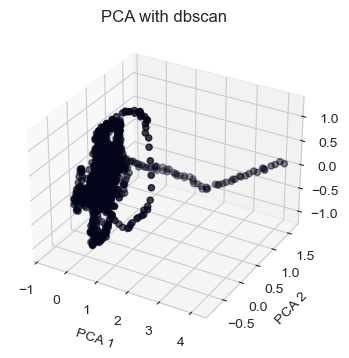

In [95]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = pca_3D_data[:, 0]
y = pca_3D_data[:, 1]
z = pca_3D_data[:, 2]

axs.scatter(x, y, z, c = dbscan_PCA_3D_data)

axs.set_xlabel('PCA 1')
axs.set_ylabel('PCA 2')
axs.set_zlabel('PCA 3')
axs.set_title('PCA with dbscan')

from tSNE

In [87]:
# fit data
dbscan_with_tSNE = dbscan.fit(tsne_3D_data)

In [90]:
set(dbscan_with_tSNE.labels_)

{-1}

In [ ]:
# predict cluster
dbscan_tSNE_3D_data = dbscan_with_tSNE.predict(tsne_3D_data)

Text(0.5, 0.92, 'tSNE')

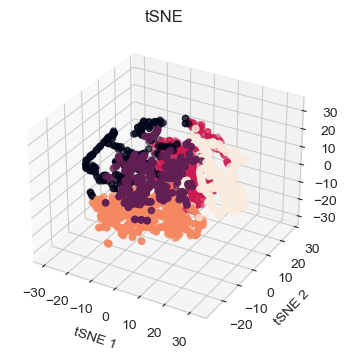

In [ ]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = tsne_3D_data[:, 0]
y = tsne_3D_data[:, 1]
z = tsne_3D_data[:, 2]

axs.scatter(x, y, z, c = dbscan_tSNE_3D_data, marker='o')

axs.set_xlabel('tSNE 1')
axs.set_ylabel('tSNE 2')
axs.set_zlabel('tSNE 3')
axs.set_title('tSNE with dbscan')

from ISOMAP

In [ ]:
# fit data
dbscan_with_isomap = dbscan.fit(ISOMAP_3D_data)

In [ ]:
# predict cluster
dbscan_isomap_3D_data = dbscan_with_isomap.predict(ISOMAP_3D_data)

Text(0.5, 0.92, 'ISOMAP')

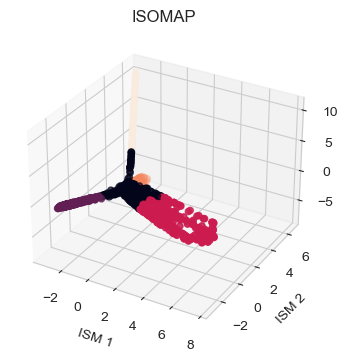

In [ ]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = ISOMAP_3D_data[:, 0]
y = ISOMAP_3D_data[:, 1]
z = ISOMAP_3D_data[:, 2]

axs.scatter(x, y, z, c = dbscan_isomap_3D_data, marker='o')

axs.set_xlabel('ISM 1')
axs.set_ylabel('ISM 2')
axs.set_zlabel('ISM 3')
axs.set_title('ISOMAP with dbscan')

from fast ICA

In [ ]:
# fit data
dbscan_with_fastICA = dbscan.fit(fastICA_3D_data)

In [ ]:
# predict cluster
dbscan_fastICA_3D_data = dbscan_with_fastICA.predict(fastICA_3D_data)

Text(0.5, 0.92, 'Fast ICA')

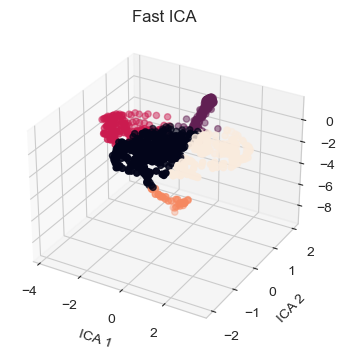

In [ ]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = fastICA_3D_data[:, 0]
y = fastICA_3D_data[:, 1]
z = fastICA_3D_data[:, 2]

axs.scatter(x, y, z, c = dbscan_fastICA_3D_data, marker='o')

axs.set_xlabel('ICA 1')
axs.set_ylabel('ICA 2')
axs.set_zlabel('ICA 3')
axs.set_title('Fast ICA with dbscan')

from Spectral Embedding

In [ ]:
# fit data
dbscan_with_Embedding = dbscan.fit(embedding_3D_data)

In [ ]:
# predict cluster
dbscan_embedding_3D_data = dbscan_with_Embedding.predict(embedding_3D_data)

Text(0.5, 0.92, 'Spectral Embedding')

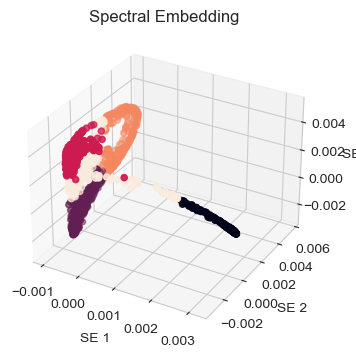

In [ ]:
# plot cluster

fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : True})

axs = fig.add_subplot(111, projection='3d')

x = embedding_3D_data[:, 0]
y = embedding_3D_data[:, 1]
z = embedding_3D_data[:, 2]

axs.scatter(x, y, z, c = dbscan_embedding_3D_data)

axs.set_xlabel('SE 1')
axs.set_ylabel('SE 2')
axs.set_zlabel('SE 3')
axs.set_title('Embedding with dbscan')

## 3.2 DBSCAN